In [108]:
#Import Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

%matplotlib inline
sns.set(style="dark")

In [109]:
# Importing data
product = pd.read_csv('./raw_data/product.csv')
product_classes = pd.read_csv('./raw_data/product_class.csv')
promotion = pd.read_csv('./raw_data/promotion.csv')
transactions = pd.read_csv('./raw_data/transactions.csv')

## __Data Wrangling__ <br>
## --Product--:

In [110]:
print("Missing Values in Product data: ",product.isnull().any().sum()) #checking for missing values
print("Shape of product data: ", product.shape) #checking number of rows and columns
product.head(5) #checking first few rows and columns of product data

Missing Values in Product data:  0
Shape of product data:  (1560, 15)


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,'Washington','Washington Berry Juice',90748583674,'2.8500',8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,'Washington','Washington Mango Drink',96516502499,'0.7400',7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,'Washington','Washington Strawberry Drink',58427771925,'0.8300',13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,'Washington','Washington Cream Soda',64412155747,'3.6400',10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,'Washington','Washington Diet Soda',85561191439,'2.1900',6.66,4.65,1,0,7,10,20.7,21.90,19.20


In [111]:
product.columns # Prints name of the columns.

Index(['product_class_id', ' product_id', ' brand_name', ' product_name',
       ' SKU', ' SRP', ' gross_weight', ' net_weight', ' recyclable_package',
       ' low_fat', ' units_per_case', ' cases_per_pallet', ' shelf_width',
       ' shelf_height', ' shelf_depth'],
      dtype='object')

Some of the column names have white space at the beginning.

In [112]:
product.columns = product.columns.str.lstrip() #lstrip() removes white space at the beginning of the string.

In [113]:
product.columns

Index(['product_class_id', 'product_id', 'brand_name', 'product_name', 'SKU',
       'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'cases_per_pallet', 'shelf_width', 'shelf_height',
       'shelf_depth'],
      dtype='object')

In [114]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 15 columns):
product_class_id      1560 non-null int64
product_id            1560 non-null int64
brand_name            1560 non-null object
product_name          1560 non-null object
SKU                   1560 non-null int64
SRP                   1560 non-null object
gross_weight          1560 non-null float64
net_weight            1560 non-null float64
recyclable_package    1560 non-null int64
low_fat               1560 non-null int64
units_per_case        1560 non-null int64
cases_per_pallet      1560 non-null int64
shelf_width           1560 non-null float64
shelf_height          1560 non-null float64
shelf_depth           1560 non-null float64
dtypes: float64(5), int64(7), object(3)
memory usage: 182.9+ KB


We see that all 15 columns have 1560 values, None of them have NaN values and all seems to be in the correct data type format. Except SRP which is type Object and It should be type int.

In [115]:
#product.SRP = product.SRP.astype(float)
'''Gives us error as integer are inside single quotations marks.
 We will have to remove single quotes, and then convert this series to float type. We will use anonymous function
 lambda to remove single quotes, and we will apply it the entire series.
'''
product['SRP'] = product.SRP.apply(lambda x : x.replace('\'' , "")) # Removes single quotes
product.SRP = product.SRP.astype(float) # Converts product['SRP'] to float dtype
product.describe()

,product_class_id,product_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
count,1560.000000,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,54.403205,780.500000,5.562930e+10,2.117282,13.804821,11.791308,0.559615,0.353846,18.908333,9.475641,12.900692,12.915103,12.933750
std,30.872364,450.477524,2.580380e+10,0.932779,4.631014,4.693747,0.496592,0.478315,10.254237,2.638963,5.763655,5.844180,5.603036
min,1.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000
25%,30.000000,390.750000,3.345056e+10,1.417500,9.657500,7.705000,0.000000,0.000000,10.000000,7.000000,7.860000,7.867500,8.300000
50%,57.500000,780.500000,5.629308e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.700000,12.850000
75%,79.000000,1170.250000,7.798317e+10,2.792500,17.725000,16.000000,1.000000,1.000000,28.000000,12.000000,17.625000,18.200000,17.600000
max,110.000000,1560.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000


Statistical Description of Numerical columns of product data, No irregular values here looks good for now. Let's move on to the other data files.

## __Product classes__

In [116]:
print("Missing Values in Product data: ",product_classes.isnull().any().sum()) #checking for missing values
print("Shape of product data: ", product_classes.shape) #checking number of rows and columns
product_classes.head(3) #checking first few rows and columns of product data

Missing Values in Product data:  0
Shape of product data:  (110, 5)


,product_class_id,product_subcategory,product_category,product_department,product_family
0,1,'Nuts','Specialty','Produce','Food'
1,2,'Shellfish','Seafood','Seafood','Food'
2,3,'Canned Fruit','Fruit','Canned Products','Food'


In [117]:
product_classes.columns # Prints the name of the columns

Index(['product_class_id', ' product_subcategory', ' product_category',
       ' product_department', ' product_family'],
      dtype='object')

In [118]:
product_classes.columns = product_classes.columns.str.lstrip() #lstrip() removes white space at the beginning of the string.

In [119]:
product_classes.columns

Index(['product_class_id', 'product_subcategory', 'product_category',
       'product_department', 'product_family'],
      dtype='object')

White spaces in front of the names have be removed.

In [120]:
product_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
product_class_id       110 non-null int64
product_subcategory    110 non-null object
product_category       110 non-null object
product_department     110 non-null object
product_family         110 non-null object
dtypes: int64(1), object(4)
memory usage: 4.4+ KB


Looks good 4 columns are string type and 1 int64. Product_classes data looks good for now.

## __Promotion__

In [121]:
print("Missing Values in Promotion dataset: ", promotion.isnull().any()) #checking for missing values
print("Shape of Promotion dataset: ",promotion.shape) #checking number of rows and columns
promotion.head(3) #checking first few rows and columns of product data

Missing Values in Promotion dataset:  promotion_id              False
 promotion_district_id    False
 promotion_name           False
 media_type               False
 cost                     False
 start_date                True
 end_date                  True
Unnamed: 7                 True
Unnamed: 8                 True
dtype: bool
Shape of Promotion dataset:  (1864, 9)


,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date,Unnamed: 7,Unnamed: 8
0,0,0,'No Promotion','No Media','0.0000',NaN,NaN,NaN,NaN
1,1,110,'High Roller Savings','Product Attachment','14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00',NaN,NaN
2,2,110,'Green Light Special','Product Attachment','8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00',NaN,NaN


Promotion dataset has a lot of missing values, columns['start_date', 'end_date', 'Unnamed: 7', 'Unnamed: 8'], have missing values, Let's check further and see we do we have these missing values, and how we should impute these.

In [122]:
promotion.columns = promotion.columns.str.lstrip() #Removes white spaces in front of the names
promotion.columns

Index(['promotion_id', 'promotion_district_id', 'promotion_name', 'media_type',
       'cost', 'start_date', 'end_date', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [123]:
promotion.head(10)

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date,Unnamed: 7,Unnamed: 8
0,0,0,'No Promotion','No Media','0.0000',NaN,NaN,NaN,NaN
1,1,110,'High Roller Savings','Product Attachment','14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00',NaN,NaN
2,2,110,'Green Light Special','Product Attachment','8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00',NaN,NaN
3,3,110,'Wallet Savers','Radio','12512.0000','1996-02-02 00:00:00','1996-02-05 00:00:00',NaN,NaN
4,4,110,'Weekend Markdown','In-Store Coupon','11256.0000','1996-02-13 00:00:00','1996-02-15 00:00:00',NaN,NaN
5,5,110,'Bag Stuffers',Sunday Paper Radio',,12275.0000','1996-02-28 00:00:00','1996-03-01 00:00:00',NaN
6,6,110,'Save-It Sale','Daily Paper','9472.0000','1996-03-14 00:00:00','1996-03-16 00:00:00',NaN,NaN
7,7,110,'Fantastic Discounts','Sunday Paper,Radio,TV','14278.0000','1996-03-29 00:00:00','1996-04-02 00:00:00'
8,8,110,'Price Winners','Sunday Paper,Radio','14731.0000','1996-04-10 00:00:00','1996-04-13 00:00:00',NaN
9,9,110,'Dimes Off','Daily Paper','14065.0000','1996-04-26 00:00:00','1996-04-29 00:00:00',NaN,NaN


- Looks like this files is not been read correctly, as some of the values in media_type column has been stretched to cost and start_date columns, which resulted data of start_date and end_date to be moved to generic columns (columns automatically created by pandas) Unnamed:7 and Unnamed:8 <br>
- First row needs to be removed

As this dataset is small, easier way to handle missing values, and to move data back to their respective columns, is to run a for loop that will check for values in Unnamed:7 and Unnamed:8 columns: <br>
- If both columns contains values: Values will shift two columns to the left <br>
- If column Unnamed: 7 contains values and Unnamed: 8 contains NaN:  Values will shift 1 column to the left

In [124]:
'''For loop that runs through each row of the dataset:
first condition checks for data in both columns and second if condition checks for data present only in Unnamed:7
column'''

for i in range(len(promotion)): 
    if (promotion.iloc[i]['Unnamed: 7'] is not np.nan) and (promotion.iloc[i]['Unnamed: 8'] is not np.nan):
        promotion.at[i,'media_type']  = str(promotion.iloc[i]['media_type']) + str(promotion.iloc[i]['cost']) + str(promotion.iloc[i]['start_date'])
        promotion.at[i, 'cost']       = str(promotion.iloc[i]['end_date'])
        promotion.at[i, 'start_date'] = promotion.iloc[i]['Unnamed: 7']
        promotion.at[i, 'end_date']   = promotion.iloc[i]['Unnamed: 8']
    
      
    elif (promotion.iloc[i]['Unnamed: 7'] is not np.nan) and (promotion.iloc[i]['Unnamed: 8'] is np.nan):
        promotion.at[i, 'media_type'] = str(promotion.iloc[i]['media_type']) + str(promotion.iloc[i]['cost'])
        promotion.at[i, 'cost']       = promotion.iloc[i]['start_date']
        promotion.at[i, 'start_date'] = promotion.iloc[i]['end_date']
        promotion.at[i, 'end_date']   = promotion.iloc[i]['Unnamed: 7']
      


In [125]:
promotion.drop(['Unnamed: 7', 'Unnamed: 8'], axis = 1, inplace =True) #Removes Last two columns

In [126]:
promotion.head(10) #Prints first 10 rows of the dataset

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
0,0,0,'No Promotion','No Media','0.0000',NaN,NaN
1,1,110,'High Roller Savings','Product Attachment','14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00'
2,2,110,'Green Light Special','Product Attachment','8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00'
3,3,110,'Wallet Savers','Radio','12512.0000','1996-02-02 00:00:00','1996-02-05 00:00:00'
4,4,110,'Weekend Markdown','In-Store Coupon','11256.0000','1996-02-13 00:00:00','1996-02-15 00:00:00'
5,5,110,'Bag Stuffers',Sunday Paper Radio',12275.0000','1996-02-28 00:00:00','1996-03-01 00:00:00'
6,6,110,'Save-It Sale','Daily Paper','9472.0000','1996-03-14 00:00:00','1996-03-16 00:00:00'
7,7,110,'Fantastic Discounts','Sunday Paper Radio TV','14278.0000','1996-03-29 00:00:00','1996-04-02 00:00:00'
8,8,110,'Price Winners','Sunday Paper Radio','14731.0000','1996-04-10 00:00:00','1996-04-13 00:00:00'
9,9,110,'Dimes Off','Daily Paper','14065.0000','1996-04-26 00:00:00','1996-04-29 00:00:00'


In [127]:
print(promotion.shape) # Shape of the dataset before removing first row
promotion.drop(promotion.index[0], inplace=True)
print(promotion.shape) #Shape after removing first row

promotion.head(2)

(1864, 7)
(1863, 7)


,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
1,1,110,'High Roller Savings','Product Attachment','14435.0000','1996-01-03 00:00:00','1996-01-06 00:00:00'
2,2,110,'Green Light Special','Product Attachment','8907.0000','1996-01-18 00:00:00','1996-01-20 00:00:00'


In [128]:
promotion.isnull().any().sum()

0

No more missing values

In [129]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 1 to 1863
Data columns (total 7 columns):
promotion_id             1863 non-null int64
promotion_district_id    1863 non-null int64
promotion_name           1863 non-null object
media_type               1863 non-null object
cost                     1863 non-null object
start_date               1863 non-null object
end_date                 1863 non-null object
dtypes: int64(2), object(5)
memory usage: 116.4+ KB


All columns are in right format except, cost which should be type(float), start_date and end_date should be time(datetime format). Lets convert them to right data type format.

In [130]:
# promotion['cost'] = promotion['cost'].astype(float) gives us similar error as above in ln[117]
'''Gives us error as float values are inside single quotations marks.
 We will have to remove single quotes, and then convert the entire serie to float type. We will use anonymous function
 lambda to remove single quotes, and we will apply it to the entire series as we did above in ln 117.
'''
promotion['cost'] = promotion.cost.apply(lambda x : x.replace('\'' , "")) # Removes single quotes
promotion['cost'] = promotion['cost'].astype(float) # Converts promotion['cost'] to float dtype
promotion['start_date'] = pd.to_datetime(promotion['start_date']) #convert columns to datetime objects
promotion['end_date'] = pd.to_datetime(promotion['end_date'])
promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 1 to 1863
Data columns (total 7 columns):
promotion_id             1863 non-null int64
promotion_district_id    1863 non-null int64
promotion_name           1863 non-null object
media_type               1863 non-null object
cost                     1863 non-null float64
start_date               1863 non-null datetime64[ns]
end_date                 1863 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 116.4+ KB


In [131]:
promotion.describe()

,promotion_id,promotion_district_id,cost
count,1863.000000,1863.000000,1863.000000
mean,948.284487,121.493827,10032.484702
std,547.441405,6.923383,2904.113058
min,1.000000,110.000000,5001.000000
25%,475.000000,115.500000,7525.000000
50%,948.000000,121.000000,9990.000000
75%,1420.500000,127.000000,12540.500000
max,1896.000000,133.000000,14997.000000


## __Transactions data__:

In [132]:
print("Missing Values in Transactions dataset: ", transactions.isnull().any().sum()) #checking for missing values
print("Shape of Transactions dataset: ",transactions.shape) #checking number of rows and columns
transactions.head(3) #checking first few rows and columns of product data

Missing Values in Transactions dataset:  0
Shape of Transactions dataset:  (173602, 11)


,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count
0,1,157,24,1869,12,'Q4',1997,'8.5500','2.9925','3.0000',1
1,1,456,15,0,6,'Q2',1997,'11.4000','4.3320','4.0000',1
2,1,638,11,0,9,'Q3',1997,'8.5500','2.9925','3.0000',1


In [133]:
transactions.columns = transactions.columns.str.lstrip() #Removes white spaces in front of the names
transactions.columns

Index(['product_id', 'customer_id', 'store_id', 'promotion_id',
       'month_of_year', 'quarter', 'the_year', 'store_sales', 'store_cost',
       'unit_sales', 'fact_count'],
      dtype='object')

In [134]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173602 entries, 0 to 173601
Data columns (total 11 columns):
product_id       173602 non-null int64
customer_id      173602 non-null int64
store_id         173602 non-null int64
promotion_id     173602 non-null int64
month_of_year    173602 non-null int64
quarter          173602 non-null object
the_year         173602 non-null int64
store_sales      173602 non-null object
store_cost       173602 non-null object
unit_sales       173602 non-null object
fact_count       173602 non-null object
dtypes: int64(6), object(5)
memory usage: 14.6+ MB


store_sales, store_cost, unit_sales should be type float and fact_count should be int

In [135]:
transactions['store_sales'] = transactions['store_sales'].apply(lambda x : x.replace('\'' , "")) # Removes single quotes
transactions['store_cost']  = transactions['store_cost'].apply(lambda x: x.replace('\'', ""))
transactions['unit_sales']  = transactions['unit_sales'].apply(lambda x: x.replace('\'', ""))
transactions['store_sales'] = transactions['store_sales'].astype(float)
transactions['store_cost'] = transactions['store_cost'].astype(float)
transactions['unit_sales'] = transactions['unit_sales'].astype(float)

In [136]:
print(transactions.fact_count.value_counts())

1      131025
1       42511
2          47
2          17
1);         2
Name: fact_count, dtype: int64


There are irregular values in fact_count series<br>
- '1);' should replaced with 1 <br>
- we have two 1s and two 2s, one is type int and other type string. <br>

Easy way to handle this situation is by using lambda function convert all the values to string (int 1s and int 2s will also be converted to string as replace function only works with type string) and then replace '1);' with 1. 
In the end we will only have two values in fact_count 1 and 2 both string which we will convert to integers.

In [137]:
transactions['fact_count'] = transactions['fact_count'].apply(lambda x : str(x).replace('1);' , "1"))
transactions['fact_count'] = transactions['fact_count'].astype(int)

In [138]:
set(transactions.fact_count) #checking values in transaction.fact_count

{1, 2}

In [139]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173602 entries, 0 to 173601
Data columns (total 11 columns):
product_id       173602 non-null int64
customer_id      173602 non-null int64
store_id         173602 non-null int64
promotion_id     173602 non-null int64
month_of_year    173602 non-null int64
quarter          173602 non-null object
the_year         173602 non-null int64
store_sales      173602 non-null float64
store_cost       173602 non-null float64
unit_sales       173602 non-null float64
fact_count       173602 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 14.6+ MB


All the columns are in correct data type format. <br>

__This concludes Data Wrangling part as all the datasets are in correct format, Irregular values has been taken care of and all the columns are in right data type format and they are ready for further analysis.__

In [140]:
product.head(2)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,'Washington','Washington Berry Juice',90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.4
1,52,2,'Washington','Washington Mango Drink',96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.6


In [141]:
product_classes.head(2)

,product_class_id,product_subcategory,product_category,product_department,product_family
0,1,'Nuts','Specialty','Produce','Food'
1,2,'Shellfish','Seafood','Seafood','Food'


In [142]:
promotion.head(2)

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
1,1,110,'High Roller Savings','Product Attachment',14435.0,1996-01-03,1996-01-06
2,2,110,'Green Light Special','Product Attachment',8907.0,1996-01-18,1996-01-20


In [143]:
transactions.head(2)

,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count
0,1,157,24,1869,12,'Q4',1997,8.55,2.9925,3.0,1
1,1,456,15,0,6,'Q2',1997,11.40,4.3320,4.0,1


In [144]:
print("Shape of product dataset ", product.shape)
print("Shape of product_classes dataset ", product_classes.shape)
print("Shape of transactions dataset ", transactions.shape)
print("Shape of promotion dataset ", promotion.shape)


Shape of product dataset  (1560, 15)
Shape of product_classes dataset  (110, 5)
Shape of transactions dataset  (173602, 11)
Shape of promotion dataset  (1863, 7)


### Merging dataframes <br>

We will have to combine data from multiple datasets for example: Information about products (categories, subcategories, department etc) is contained in product_classes dataset, Information about Brand name, product name is present in product dataset. We will have to combine information from these two datasets to transactions dataset and using descriptive statistics and visualization technique we will try to undersand the sale trend at these foodmarts.<br>

- First we will merge product and product_classes datasets on "product_class_id" column<br>
- Then we will merge the new dataset (product + product_classes) with transaction dataset on "product_id" column<br>


In [145]:
'''New dataset will only contains columns relevent to our analysis, we will pick them below'''

# pro_cols List contains name of the columns we are going to use from product dataset
pro_cols = ['product_class_id', 'product_id', 'brand_name', 'product_name']

# proclass_col list contains name of the columns we are going to use from product classes dataset
proclass_cols = ['product_class_id', 'product_category', 'product_subcategory', 'product_department']

# Merging product classes + product
df = pd.merge(product[pro_cols], product_classes[proclass_cols], on = 'product_class_id', how = 'left')

# Merging with transactions dataset on left join
df = pd.merge(transactions, df, on = 'product_id', how = 'left')

In [146]:
print("NaN values in df dataframe: ", df.isnull().any().sum()) #checking for any NaN values
print("Shape of df:", df.shape[0], "rows and", df.shape[1], "columns")
df.head(2)

NaN values in df dataframe:  0
Shape of df: 173602 rows and 17 columns


,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count,product_class_id,brand_name,product_name,product_category,product_subcategory,product_department
0,1,157,24,1869,12,'Q4',1997,8.55,2.9925,3.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages'
1,1,456,15,0,6,'Q2',1997,11.40,4.3320,4.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages'


Now that we have 1 dataframe with all the information needed, we can start our analysis to explore the sale trends at foodmarts. 

### Question 1 <br>

#### Management is trying to better understand what is happening at these food marts. Please create some visualizations to help us better understand the following aspects of the Foodmart data: <br>
- Category of products sold 
- Brand of products sold


### What are the best selling categories? <br> if you want to be successful in generating a substantial income stream. A huge part of this situation comes down to what product category you choose to sell.

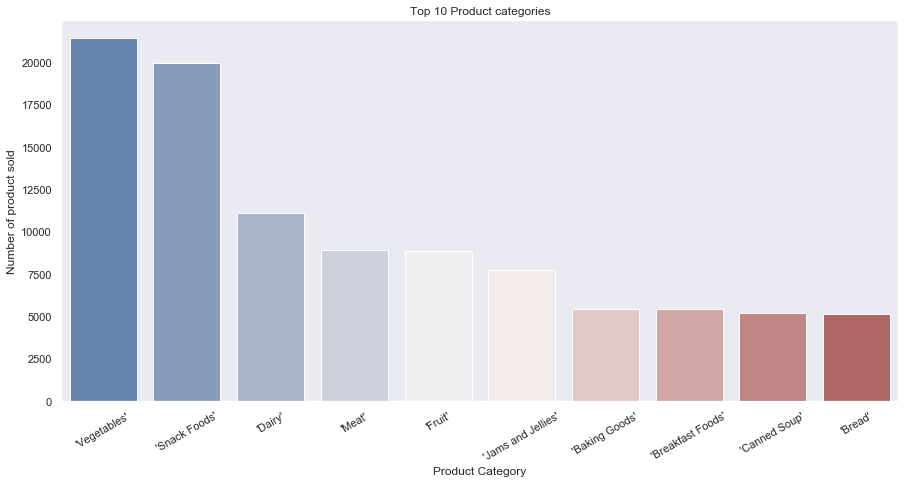

In [147]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = 'product_category', data = df, order = df.product_category.value_counts().head(10).index, palette="vlag")
plt.xticks(rotation=30)
plt.title('Top 10 Product categories')
plt.ylabel('Number of product sold')
plt.xlabel('Product Category');

Above chart shows product categories that generate most volume in a Store. The essentials - __Grocery__ is the largest bulk of the sales. 

### Categories such as Vegetables, Snack Foods and Dairy are top three categories with the most number of product sold. Let's find out below what products under these three categories were best sellers<BR>


__What are the top 5 best selling vegetables?__

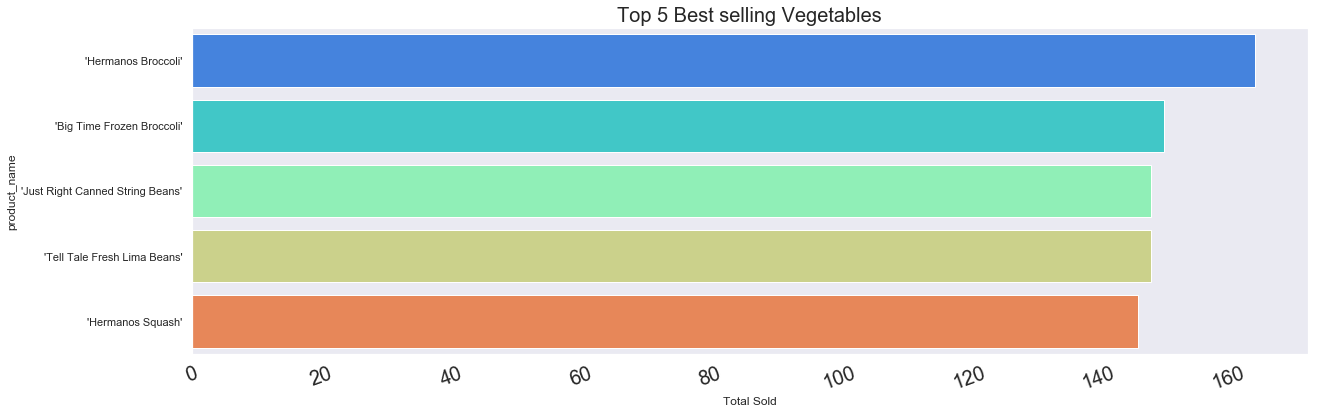

In [148]:
veg = df[df['product_category'] == "'Vegetables'"] #subsetting dataset
plt.figure(figsize=(20,6))
ax = sns.countplot(y = 'product_name', data = veg, order = veg.product_name.value_counts().head(5).index, palette="rainbow")
plt.xticks(rotation= 20, fontsize = 20)
plt.title('Top 5 Best selling Vegetables', fontsize = 20)
plt.xlabel('Total Sold');

Broccoli is the most popular and best selling vegetable, It also happens to be a veggie with some of the most health benefits. <br> <br> 
#### Let's find out what are the top 5 products sold under second best selling category: Snack Food

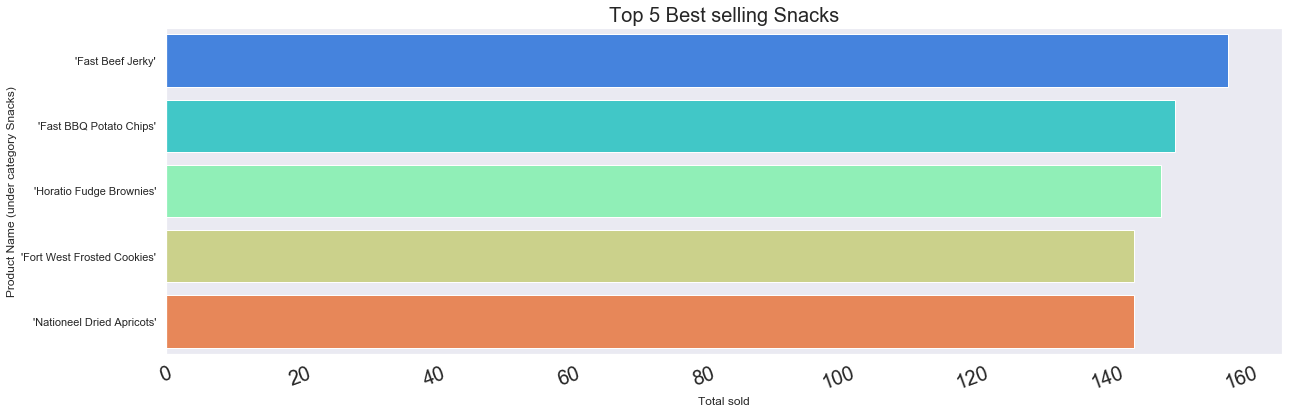

In [149]:
snk = df[df['product_category'] == "'Snack Foods'"] #subsetting dataset
plt.figure(figsize=(20,6))
ax = sns.countplot(y = 'product_name', data = snk, order = snk.product_name.value_counts().head(5).index, palette="rainbow")
plt.xticks(rotation= 20, fontsize = 20)
plt.title('Top 5 Best selling Snacks', fontsize = 20)
plt.xlabel('Total sold')
plt.ylabel('Product Name (under category Snacks)');

Looks like __Beef Jerkies__ are #1 in Americans' hearts and stomachs.

__What are the Top 5 Dairy products?__

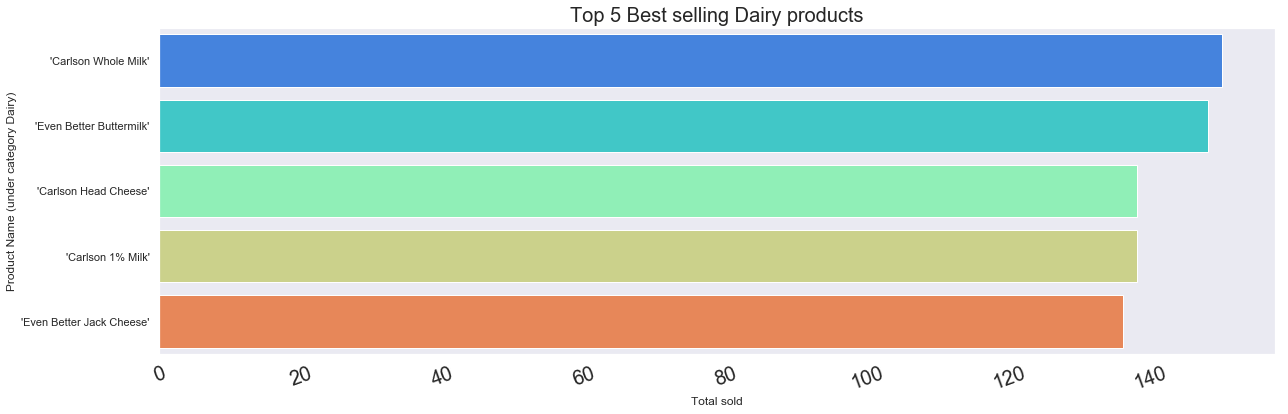

In [150]:
dairy = df[df['product_category'] == "'Dairy'"] #subsetting dataset
plt.figure(figsize=(20,6))
ax = sns.countplot(y = 'product_name', data = dairy, order = dairy.product_name.value_counts().head(5).index, palette="rainbow")
plt.xticks(rotation= 20, fontsize = 20)
plt.title('Top 5 Best selling Dairy products', fontsize = 20)
plt.xlabel('Total sold')
plt.ylabel('Product Name (under category Dairy)');

__Milk, Buttermilk and cheese__ are the top selling dairy products

### Let's now jump in to Brands and see what are some of the best-selling brands.

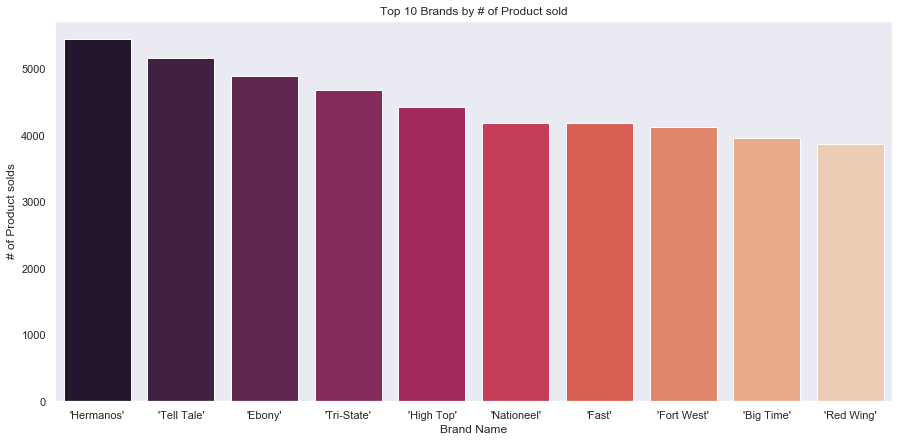

In [151]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = 'brand_name', data = df, order = df.brand_name.value_counts().head(10).index, palette="rocket")
plt.title('Top 10 Brands by # of Product sold')
plt.ylabel('# of Product solds')
plt.xlabel('Brand Name');

Above Bar chart shows Top 10 brands with the most number of product sold. __Hermanos__ tops the list followed by __Tell Tale__ and __Ebony__. <br>
But what exactly these brands sell? What kind of product do they sell? Let's find out. 
<Br> 
<br> 

### <center> Hermanos Top 5 products </center>

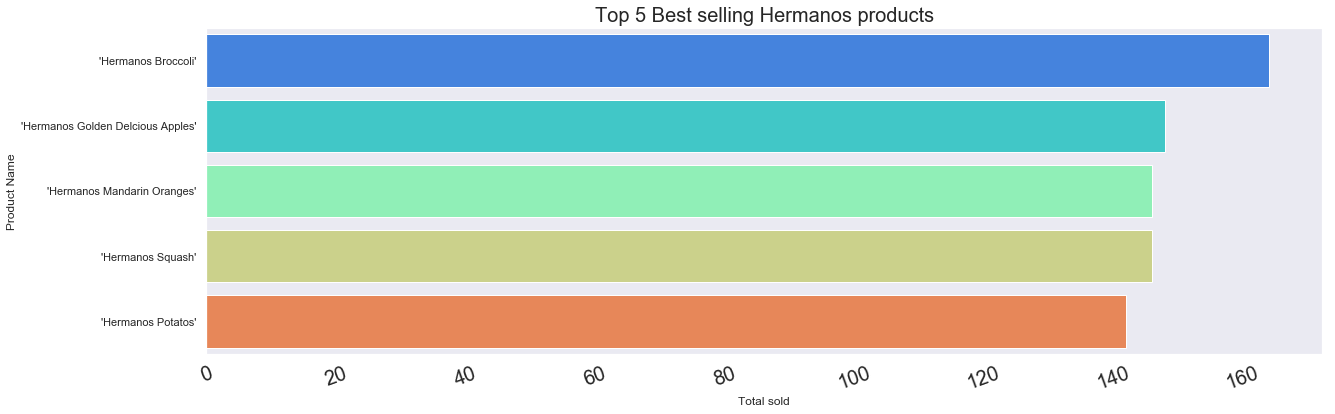

In [152]:
Hermanos = df[df['brand_name'] == "'Hermanos'"]
plt.figure(figsize=(20,6))
ax = sns.countplot(y = 'product_name', data = Hermanos, order = Hermanos.product_name.value_counts().head(5).index, palette="rainbow")
plt.xticks(rotation= 20, fontsize = 20)
plt.title('Top 5 Best selling Hermanos products', fontsize = 20)
plt.xlabel('Total sold')
plt.ylabel('Product Name');

As shown in the above chart, __Hermanos's__ top 5 best selling product are: Broccoli, Apples, Oranges, Squash and Potato

### <center> Tell Tale's Top 5 best selling products </center>

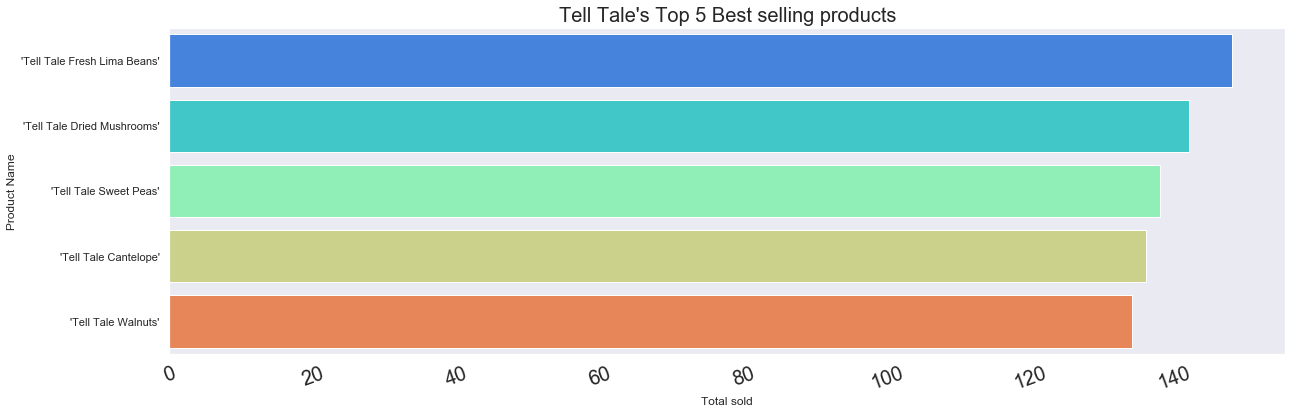

In [153]:
tell_tale = df[df['brand_name'] == "'Tell Tale'"]
plt.figure(figsize=(20,6))
ax = sns.countplot(y = 'product_name', data = tell_tale, order = tell_tale.product_name.value_counts().head(5).index, palette="rainbow")
plt.xticks(rotation= 20, fontsize = 20)
plt.title('Tell Tale\'s Top 5 Best selling products', fontsize = 20)
plt.xlabel('Total sold')
plt.ylabel('Product Name');

### <center> Ebony's Top 5 best selling products </center>

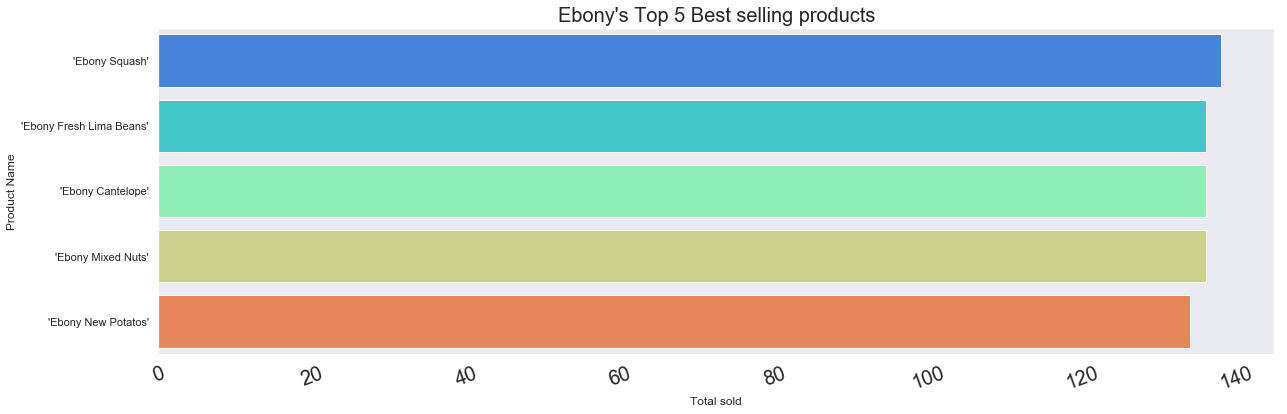

In [154]:
ebony = df[df['brand_name'] == "'Ebony'"]
plt.figure(figsize=(20,6))
ax = sns.countplot(y = 'product_name', data = ebony, order = ebony.product_name.value_counts().head(5).index, palette="rainbow")
plt.xticks(rotation= 20, fontsize = 20)
plt.title('Ebony\'s Top 5 Best selling products', fontsize = 20)
plt.xlabel('Total sold')
plt.ylabel('Product Name');

Above charts showed us Top 10 best selling categories, Best selling product under top categories, Top brands and their product. 

### Question 2<br>

#### Foodmart is developing their strategy for the next year. One of their goals is to increase sales and profitability. Please provide the executive team with insights from the data that highlight growth opportunities. Here are some ideas to get you started: <br>

    - Expand product offerings: which products or categories should we expand and why? 
    - Offer more promotions: how should we target our promotions and why?
    - Market to a certain customer segment: what segment of customers should we market to and how?
    
Feel free to think of other ideas. Please focus on only 1 to 2 opportunities and provide an executive summary of your recommendations, the potential impact, and what data you found to support your strategy.

### Let's explore how promotions effects sale trend <br>
    - For purpose of this HW i am going to assume customer_id 0 = (New Customer) and promotion_id 0 = (No promotional Transaction)


To better explore this lets create two new binary columns in our dataframe.<br>
    - First column will be categorical columns which will tell use if the transaction was promotional or not "No promotion" if promotion_id = 0 and "On promotion" if promotion_id = anything else but 0 <br>
    - Second column will be categorical column as well "New Customer": if customer_id = 0  and "Returning customers" if customer_id = anything else but 0<br>

In [155]:
# Lets create two function that will loop through customer_id column and promotion_id column in df and creates two new columns
def first_func(x):
    if x == 0:
        return "No promotion"
    else:
        return "Promotional transaction"
    
def second_func(x):
    if x == 0:
        return "New Customer"
    else:
        return "Returning customer"
    
df['promotion_no_promotion'] = df.promotion_id.apply(first_func)
df['new_cust_returning_cust'] = df.customer_id.apply(second_func)

In [156]:
df.head()

,product_id,customer_id,store_id,promotion_id,month_of_year,quarter,the_year,store_sales,store_cost,unit_sales,fact_count,product_class_id,brand_name,product_name,product_category,product_subcategory,product_department,promotion_no_promotion,new_cust_returning_cust
0,1,157,24,1869,12,'Q4',1997,8.55,2.9925,3.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages',Promotional transaction,Returning customer
1,1,456,15,0,6,'Q2',1997,11.40,4.3320,4.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages',No promotion,Returning customer
2,1,638,11,0,9,'Q3',1997,8.55,2.9925,3.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages',No promotion,Returning customer
3,1,916,7,0,4,'Q2',1997,11.40,4.9020,4.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages',No promotion,Returning customer
4,1,923,15,0,7,'Q3',1997,8.55,2.7360,3.0,1,30,'Washington','Washington Berry Juice','Pure Juice Beverages','Juice','Beverages',No promotion,Returning customer


Now that we have to new columns it will be easier for us to differ between Promotion transaction vs no promotion transactions and New customer vs Returning customers. <Br>
    - Market to a certain customer segment: what segment of customers should we market to and how?


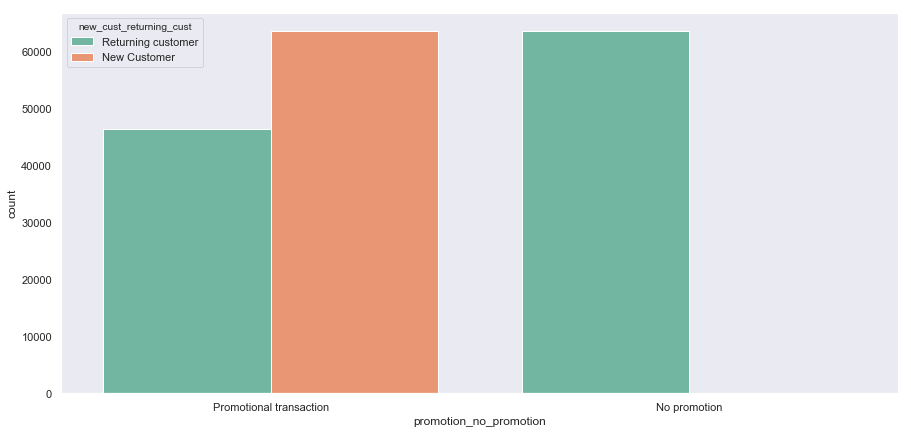

In [157]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = 'promotion_no_promotion', hue = 'new_cust_returning_cust', data = df, palette="Set2")

#### According to the chart above Promotion marketing has pulled in many new customers (one with customer_id = 0). Surprisingly these new customers did not show up on no promotion days. <br>


### Bringing new customers into your business is the most important thing you’ll do, but how on earth do you make them your regular customers? <br>
#### Let's explore top promotions that brought these new customers in


In [158]:
df[df['new_cust_returning_cust'] == 'New Customer'].promotion_id.value_counts().head()

13    11136
17     8455
3      5905
15     5904
24     5711
Name: promotion_id, dtype: int64

In [159]:
promotion[(promotion['promotion_id'] == 13) | (promotion['promotion_id'] == 17) | (promotion['promotion_id'] == 3) | (promotion['promotion_id'] == 15) | (promotion['promotion_id'] == 24)]

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
3,3,110,'Wallet Savers','Radio',12512.0,1996-02-02,1996-02-05
13,13,110,'Price Winners','Cash Register Handout',11674.0,1996-06-19,1996-06-22
15,15,110,'Save-It Sale','Sunday Paper Radio',6842.0,1996-07-18,1996-07-22
17,17,110,'Savings Galore','Cash Register Handout',13694.0,1996-08-16,1996-08-17
24,24,110,'Best Savings','Sunday Paper',10597.0,1996-11-21,1996-11-22


### Above dataframe shows promotions that attracted new customers. Promotions such as "Price Winners", "Savings Galore", "Wallet Saver", "Save-it Sale" are top promotions that attracted new customers <br>


### Business Recommendations
#### Based on the Exploratory Data Analysis  we can make the following suggestions to our clients: <br>
    
    -Product categories such as "Vegetables & Fruits", "Snacks", "Dairy" generates most volume in a store. It makes perfect business sense to invest more resources in improving these sections of the store, as these sections attract the most customers.
    
    -Brands sucsh as "Hermanos", "Tell-tale" "Ebony" were the top selling brands, Foodmarts should focus more on these brands, for example make better relationship with their distributors to get these brands on much better price so they can be sold at reasoanable price to attract more customers.
    
    -Foodmarts should specifically focus more on promotions such as "Price Winner", "Savings Galore", "Wallter Saver", "Save-it Sale" as these promotions brought in the most number of new customers, along these promotions they should also start loyalty program, or similar to convert these new customers to regular customers. Maximum marketing effort must be aimed at these people and the most enticing, attractive offers must be made to them to increase their instore transaction rate.
